In [43]:
import pandas as pd
import numpy as np
# import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
carbon_df = pd.read_csv("../data/raw/carbon_emission_raw.csv")
region_df = pd.read_csv("../data/raw/region.csv")

In [45]:
carbon_df = carbon_df.drop(['Indicator Name', 'Indicator Code'], axis=1)


In [46]:
non_country_names = [
    'Africa Eastern and Southern', 'Africa Western and Central', 'Arab World', 'Bahamas, The',
    'Central Europe and the Baltics', 'Caribbean small states', 'East Asia & Pacific (excluding high income)',
    'Early-demographic dividend', 'East Asia & Pacific', 'Europe & Central Asia (excluding high income)',
    'Europe & Central Asia', 'Euro area', 'European Union', 'Fragile and conflict affected situations',
    'Heavily indebted poor countries (HIPC)', 'High income', 'IBRD only', 'IDA & IBRD total', 'IDA total',
    'IDA blend', 'IDA only', 'Latin America & Caribbean (excluding high income)', 'Latin America & Caribbean',
    'Least developed countries: UN classification', 'Low income', 'Lower middle income', 'Low & middle income',
    'Late-demographic dividend', 'Middle East & North Africa', 'Middle income', 'Middle East & North Africa (excluding high income)',
    'North America', 'OECD members', 'Other small states', 'Pacific island small states', 'Post-demographic dividend',
    'Pre-demographic dividend', 'Small states', 'Sub-Saharan Africa (excluding high income)', 'Sub-Saharan Africa',
    'East Asia & Pacific (IDA & IBRD countries)', 'Europe & Central Asia (IDA & IBRD countries)',
    'Latin America & the Caribbean (IDA & IBRD countries)', 'Middle East & North Africa (IDA & IBRD countries)',
    'South Asia (IDA & IBRD)', 'Sub-Saharan Africa (IDA & IBRD countries)', 'Upper middle income', 'World', 'South Asia'
]

carbon_df_filtered = carbon_df[~carbon_df['Country Name'].isin(non_country_names)]
carbon_df_filtered.head()


,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,Afghanistan,AFG,2046.870,1941.370,1525.470,1527.890,1493.590,1457.690,1407.300,1344.100,...,11961.890,10208.130,9402.05,9281.340,10057.590,9294.930,10022.780,10972.38,11238.830,8709.470000
3,Angola,AGO,6564.200,6674.500,6877.300,9269.700,11298.230,12719.480,15442.400,16154.900,...,23865.800,23868.000,26958.70,29610.500,31648.900,29520.700,25064.800,23637.40,24382.900,19814.500000
4,Albania,ALB,6060.500,4119.600,2239.300,2078.400,2084.700,1951.100,1968.000,1479.160,...,5136.700,4541.800,4795.40,5188.000,4797.000,4573.200,5403.700,5316.10,4993.300,4383.200000
5,Andorra,AND,406.704,406.704,406.704,410.368,406.704,425.024,454.336,465.328,...,490.976,487.312,476.32,461.664,465.328,468.992,465.328,494.64,479.984,448.884399
7,United Arab Emirates,ARE,55210.400,61564.100,59702.800,63620.200,70779.600,75166.700,78528.300,81440.900,...,166631.500,175687.900,184960.80,186639.800,195409.400,200398.500,191935.000,174220.30,185645.700,188088.700000


In [47]:
carbon_df_filtered.shape

(190, 33)

In [48]:
region_df.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


In [49]:
merged_df = pd.merge(carbon_df_filtered, region_df[['Country Code','Region']], on='Country Code', how='left')
merged_df.head()

,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Region
0,Afghanistan,AFG,2046.870,1941.370,1525.470,1527.890,1493.590,1457.690,1407.300,1344.100,...,10208.130,9402.05,9281.340,10057.590,9294.930,10022.780,10972.38,11238.830,8709.470000,South Asia
1,Angola,AGO,6564.200,6674.500,6877.300,9269.700,11298.230,12719.480,15442.400,16154.900,...,23868.000,26958.70,29610.500,31648.900,29520.700,25064.800,23637.40,24382.900,19814.500000,Sub-Saharan Africa
2,Albania,ALB,6060.500,4119.600,2239.300,2078.400,2084.700,1951.100,1968.000,1479.160,...,4541.800,4795.40,5188.000,4797.000,4573.200,5403.700,5316.10,4993.300,4383.200000,Europe & Central Asia
3,Andorra,AND,406.704,406.704,406.704,410.368,406.704,425.024,454.336,465.328,...,487.312,476.32,461.664,465.328,468.992,465.328,494.64,479.984,448.884399,Europe & Central Asia
4,United Arab Emirates,ARE,55210.400,61564.100,59702.800,63620.200,70779.600,75166.700,78528.300,81440.900,...,175687.900,184960.80,186639.800,195409.400,200398.500,191935.000,174220.30,185645.700,188088.700000,Middle East & North Africa


In [50]:
merged_df.to_csv("../data/proceed/carbon_emission_proceed.csv")

In [51]:
carbon_df_new = merged_df.copy()
carbon_df_new.head()

,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Region
0,Afghanistan,AFG,2046.870,1941.370,1525.470,1527.890,1493.590,1457.690,1407.300,1344.100,...,10208.130,9402.05,9281.340,10057.590,9294.930,10022.780,10972.38,11238.830,8709.470000,South Asia
1,Angola,AGO,6564.200,6674.500,6877.300,9269.700,11298.230,12719.480,15442.400,16154.900,...,23868.000,26958.70,29610.500,31648.900,29520.700,25064.800,23637.40,24382.900,19814.500000,Sub-Saharan Africa
2,Albania,ALB,6060.500,4119.600,2239.300,2078.400,2084.700,1951.100,1968.000,1479.160,...,4541.800,4795.40,5188.000,4797.000,4573.200,5403.700,5316.10,4993.300,4383.200000,Europe & Central Asia
3,Andorra,AND,406.704,406.704,406.704,410.368,406.704,425.024,454.336,465.328,...,487.312,476.32,461.664,465.328,468.992,465.328,494.64,479.984,448.884399,Europe & Central Asia
4,United Arab Emirates,ARE,55210.400,61564.100,59702.800,63620.200,70779.600,75166.700,78528.300,81440.900,...,175687.900,184960.80,186639.800,195409.400,200398.500,191935.000,174220.30,185645.700,188088.700000,Middle East & North Africa


In [52]:
carbon_df_new['Total Emission'] = carbon_df_new.loc[:, '1990':'2020'].sum(axis=1)
carbon_df_new['Yearly Mean'] = carbon_df_new.loc[:, '1990':'2020'].mean(axis=1)
carbon_df_new['Yearly Standard Deviation'] = carbon_df_new.loc[:, '1990':'2020'].std(axis=1)
carbon_df_new['Yearly Minimum'] = carbon_df_new.loc[:, '1990':'2020'].min(axis=1)
carbon_df_new['Yearly Maximum'] = carbon_df_new.loc[:, '1990':'2020'].max(axis=1)

In [53]:
carbon_df_new.head()

,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2017,2018,2019,2020,Region,Total Emission,Yearly Mean,Yearly Standard Deviation,Yearly Minimum,Yearly Maximum
0,Afghanistan,AFG,2046.870,1941.370,1525.470,1527.890,1493.590,1457.690,1407.300,1344.100,...,10022.780,10972.38,11238.830,8709.470000,South Asia,1.494529e+05,4821.062355,4071.228614,1078.120,11961.890
1,Angola,AGO,6564.200,6674.500,6877.300,9269.700,11298.230,12719.480,15442.400,16154.900,...,25064.800,23637.40,24382.900,19814.500000,Sub-Saharan Africa,5.723800e+05,18463.870645,6639.377098,6564.200,31648.900
2,Albania,ALB,6060.500,4119.600,2239.300,2078.400,2084.700,1951.100,1968.000,1479.160,...,5403.700,5316.10,4993.300,4383.200000,Europe & Central Asia,1.203406e+05,3881.954839,1245.740934,1479.160,6060.500
3,Andorra,AND,406.704,406.704,406.704,410.368,406.704,425.024,454.336,465.328,...,465.328,494.64,479.984,448.884399,Europe & Central Asia,1.503160e+04,484.890464,48.968257,406.704,575.248
4,United Arab Emirates,ARE,55210.400,61564.100,59702.800,63620.200,70779.600,75166.700,78528.300,81440.900,...,191935.000,174220.30,185645.700,188088.700000,Middle East & North Africa,3.905361e+06,125979.390323,49610.023669,55210.400,200398.500


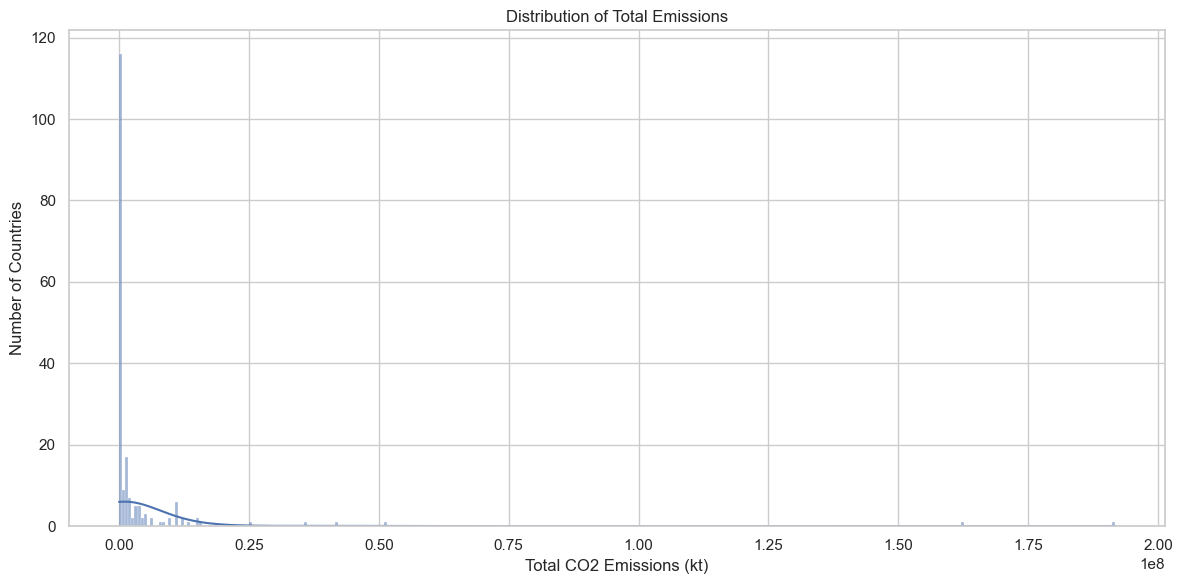

In [54]:
plt.figure(figsize=(12, 6))
sns.histplot(carbon_df_new['Total Emission'], kde=True)
plt.title('Distribution of Total Emissions')
plt.xlabel('Total CO2 Emissions (kt)')
plt.ylabel('Number of Countries')
plt.tight_layout() 
plt.show()


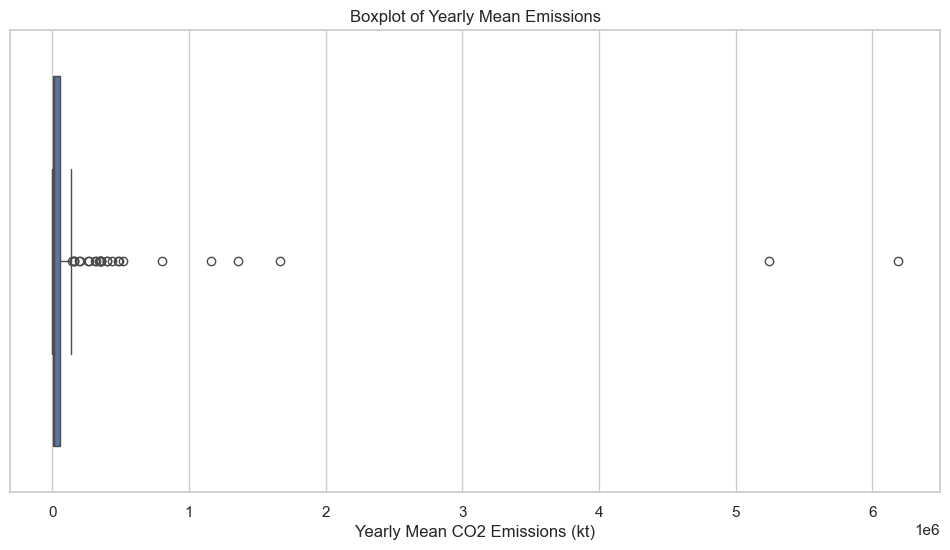

In [55]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=carbon_df_new['Yearly Mean'])
plt.title('Boxplot of Yearly Mean Emissions')
plt.xlabel('Yearly Mean CO2 Emissions (kt)')
plt.show()

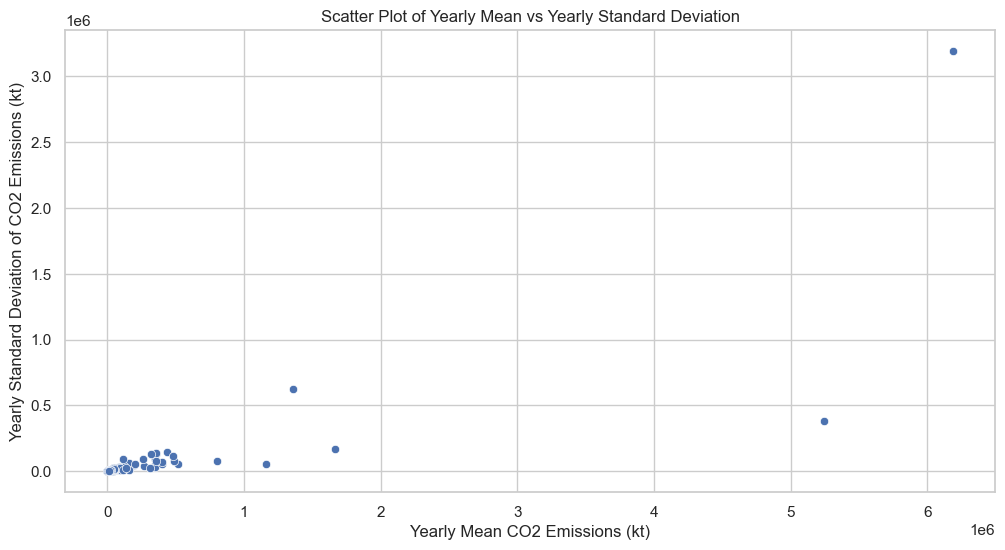

In [56]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Yearly Mean', y='Yearly Standard Deviation', data=carbon_df_new)
plt.title('Scatter Plot of Yearly Mean vs Yearly Standard Deviation')
plt.xlabel('Yearly Mean CO2 Emissions (kt)')
plt.ylabel('Yearly Standard Deviation of CO2 Emissions (kt)')
plt.show()

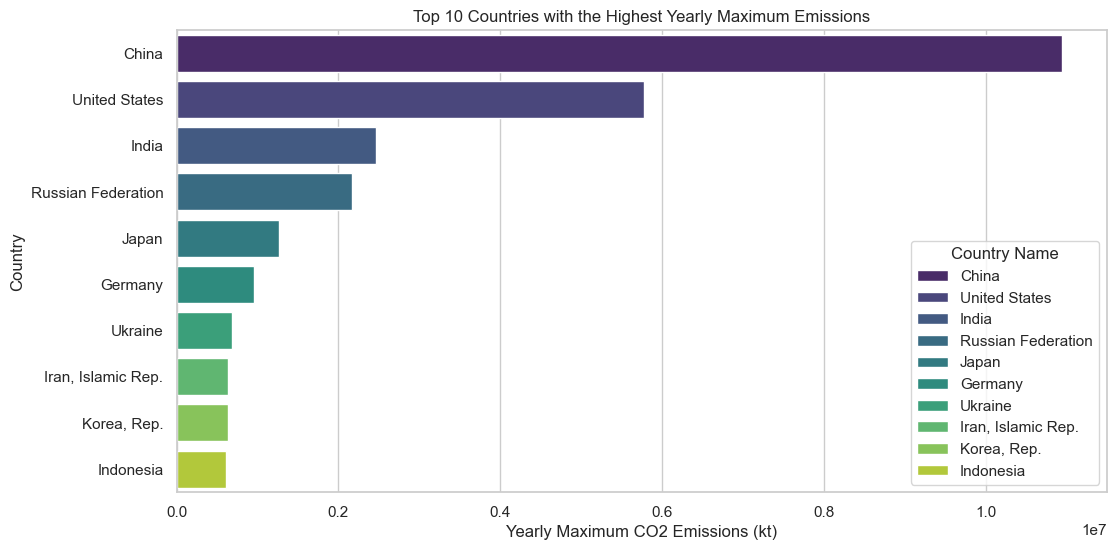

In [57]:
top_emitters = carbon_df_new.nlargest(10, 'Yearly Maximum')
plt.figure(figsize=(12, 6))
sns.barplot(x='Yearly Maximum', y='Country Name', data=top_emitters, hue="Country Name", legend=True, palette='viridis')
plt.title('Top 10 Countries with the Highest Yearly Maximum Emissions')
plt.xlabel('Yearly Maximum CO2 Emissions (kt)')
plt.ylabel('Country')
plt.savefig('../img/top_emitters_bar.png')


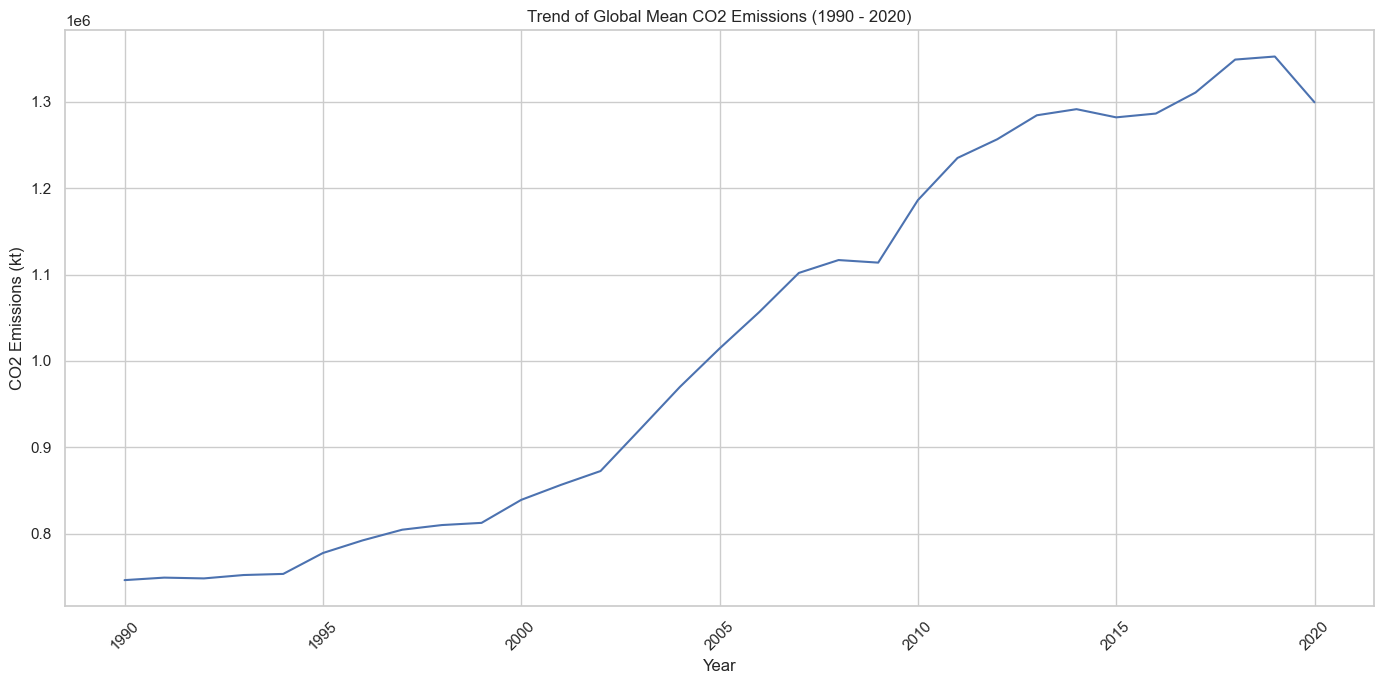

In [58]:
sns.set(style="whitegrid")

global_mean_emissions = carbon_df.drop(['Country Name', 'Country Code'], axis=1).mean()

plt.figure(figsize=(14, 7))
global_mean_emissions.plot()
plt.title('Trend of Global Mean CO2 Emissions (1990 - 2020)')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../img/global_mean_emissions.png')
